#Projeto Cores
**Objetivo**: analisar originalidade cromática de aplicativos

A criatividade é considerada uma importante competência do século XXI e pode ser desenvolvida como parte do ensino em computação, por exemplo, por meio do desenvolvimento de aplicativos. Isso se refere também ao design visual da interface de usuário desses aplicativos, incluindo como uma das partes principais a paleta de cores. Assim, como parte de avaliação da aprendizagem da criatividade, enfocando na originalidade, deve-se também avaliar e dar um feedback ao aluno em relação à originalidade da paleta de cores do app criado. Dentro desse contexto, a presente pesquisa visa o desenvolvimento de um modelo de identificação da originalidade cromática de interfaces de usuário de aplicativos como parte da avaliação da criatividade.

## Imports

In [1]:
# Extração de cores
!pip install extcolors
import extcolors

# Otimização do mapeamento da similaridade de cores
!pip install Munkres
from munkres import Munkres

# Medidas de similaridade entre cores (delta e) e transformações
#https://colour.readthedocs.io/en/latest/index.html#colour-difference-colour-difference
!pip install colour-science
import colour

#Para facilitar a verificação de questões de performance e tempo de execução
!pip install ipython-autotime

In [4]:
#from skimage import io
#from skimage.color import rgb2gray
import pandas as pd
import numpy as np
import pprint
import os
from pathlib import Path
#visualização!pip install extcolors
#import cv2
#from matplotlib import pyplot as plt

In [5]:
# Import de módulos locais desenvolvidos especificamente para este trabalho
import sys
sys.path.append('/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Entregavel')

import utils
import app
import sim

In [6]:
%reload_ext autoreload
%autoreload
%matplotlib inline

#ligar
%load_ext autotime
#desligar
#%unload_ext autotime 

time: 371 µs (started: 2022-03-23 18:35:42 +00:00)


#Carregar e visualizar imagens

##Imagens

In [ ]:
# Imagens de exemplos
exemplos = '/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/'
print('Visualization of apps in '+exemplos)
apps_path_examples_dict = utils.get_all_app_screens_path(exemplos, 'linux')
pprint.pprint(apps_path_examples_dict)

Visualization of apps in /content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/
{'blue-green50.png': ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-green50.png'],
 'blue-green80.png': ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-green80.png'],
 'blue-green90.png': ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-green90.png'],
 'blue-red50.png': ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-red50.png'],
 'blue-red80.png': ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-red80.png'],
 'blue-red90.png': ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-red90.png'],
 'blue.png': ['/content/drive/MyDrive/Doutorado/Discipli

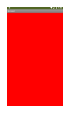

time: 341 ms (started: 2022-03-22 22:10:38 +00:00)


In [ ]:
# Exibir screenshots de um app escolhido
screens_app_path_list = apps_path_examples_dict['red.png']
app.plot_screens(screens_app_path_list, size=1, orientacao='h')

# Extrair e visualizar a paleta de cores

As próximas 2 células fazem mais ou menos a mesma coisa: extraem a paleta de cores.

Elas estão aqui para comparar o custo computacional das duas e a quantidade de cores extraída.

##Extração

In [ ]:
#Extração da paleta usando delta e 2000 com CIELAB
#Muito lento - não usar
sorted_app_colors_dict_CIELAB_tol = app.extract_app_color_palette_CIELAB_delta_e(
    screens_app_path_list, delta_e=5, th_pctg=0.001)

Starting extraction...
Extraction complete. The palette has 646 colors.
Merging similar colors...
Merge complete. The palette has 11 colors.
time: 2.49 s (started: 2022-03-22 22:10:44 +00:00)


In [ ]:
#Extração da paleta usando extcolors (CIELAB com delta e 79)
#Mais rápido, porém medida de similaridade pior
tolerance = 10 #Valor ótimo de tolerancia = 10 obtido a partir de testes
_, _, sorted_app_colors_dict = app.extract_app_color_palette(screens_app_path_list, tolerance=tolerance)
print(len(sorted_app_colors_dict))

11
time: 1.73 s (started: 2022-03-22 22:10:48 +00:00)


## Visualização

As próximas 3 células fazem mais ou menos a mesma coisa: exibem a paleta de cores extraída de diferentes formas.

1. Apenas blocos das cores extraídas
2. Apenas blocos proporcionais a quantidade das cores
3. Blocos das cores extraídas com as respectivas porcentagens e código RGC

Elas estão aqui para ter diferentes formas de visualização.

Plotting 3 colors because the amount of colors above the threshold percentage (0.99) is 3 and, thus, below the threshold for quantity (20).


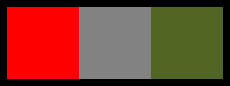

time: 91.5 ms (started: 2022-03-22 22:10:52 +00:00)


In [ ]:
# Parâmetros essenciais - interferem diretamente na visualização
th_pctg = 0.99 #tudo que tiver porcentagem >= 1% (por questões de praticidade)
th_qtd = 20 #até 20 cores (por questões de praticidade)
app.plot_app_color_palette_from_dict(sorted_app_colors_dict, size=1, th_pctg=th_pctg, th_qtd=th_qtd)

Plotting 3 colors because the amount of colors above the threshold percentage (0.99) is 3 and, thus, below the threshold for quantity (20).
Total represented percentage that will be showed in palette 99


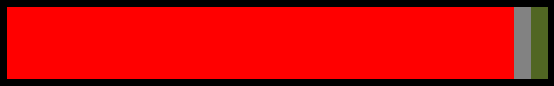

time: 2.17 s (started: 2022-03-22 22:10:55 +00:00)


In [ ]:
# Parâmetros essenciais - interferem diretamente na visualização
th_pctg = 0.99 #tudo que tiver porcentagem >= 1% (por questões de praticidade)
th_qtd = 20 #até 20 cores (por questões de praticidade)
app.plot_app_proportional_color_palette_from_dict(sorted_app_colors_dict, size=0.5, th_pctg=th_pctg, th_qtd=th_qtd)

Plotting 11 colors because the amount of colors above the threshold percentage (0) is 11 and, thus, below the threshold for quantity (100).


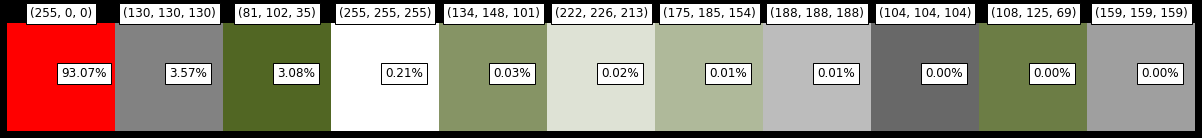

time: 395 ms (started: 2022-03-22 22:10:59 +00:00)


In [ ]:
# Parâmetros essenciais - interferem diretamente na visualização
th_pctg = 0 #tudo que tiver porcentagem >= 0%
th_qtd = 100 #até 100 cores (por questões de praticidade)
app.plot_app_color_palette_from_dict_info(sorted_app_colors_dict, size=1.5, th_pctg=th_pctg, th_qtd=th_qtd)

# Cálculo da similaridade de um par 1-1

app_palette_1 = { color1 : percent1, color2 : percent2, ...}

app_palette_2 = { color1 : percent1, color2 : percent2, ...}

## Extração e visualização

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


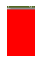

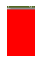

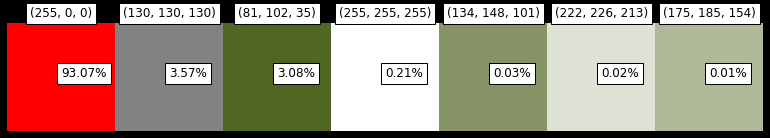

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


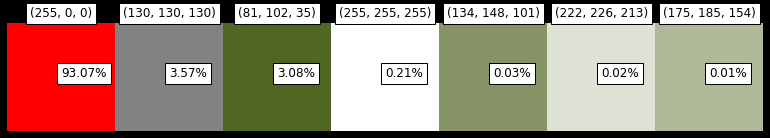

(0, 0) -> 0.00  	||	((93.07 - 93.07)*0.55 + 0.00 *1.50 ) * 93.07*0.01 = 0.00   	||	(0, 0) -> 0.00
(1, 1) -> 0.00  	||	((3.57 - 3.57)*0.55 + 0.00 *1.50 ) * 3.57*0.01 = 0.00   	||	(1, 1) -> 0.00
(2, 2) -> 0.00  	||	((3.08 - 3.08)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 2) -> 0.00
(3, 3) -> 0.00  	||	((0.21 - 0.21)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 3) -> 0.00
(4, 4) -> 0.00  	||	((0.03 - 0.03)*0.55 + 0.00 *1.50 ) * 0.03*0.01 = 0.00   	||	(4, 4) -> 0.00
(5, 5) -> 0.00  	||	((0.02 - 0.02)*0.55 + 0.00 *1.50 ) * 0.02*0.01 = 0.00   	||	(5, 5) -> 0.00
(6, 6) -> 0.00  	||	((0.01 - 0.01)*0.55 + 0.00 *1.50 ) * 0.01*0.01 = 0.00   	||	(6, 6) -> 0.00
A similaridade total é: 0.000000


0.0

time: 4.92 s (started: 2022-03-22 22:11:05 +00:00)


In [ ]:
#Exemplificação com duas telas iguais
screens_app_path_list_1 = apps_path_examples_dict['red.png']
screens_app_path_list_2 = apps_path_examples_dict['red.png']

# Parâmetros essenciais - interferem diretamente no resultado
tolerance = 10 #Valor ótimo de tolerancia = 10 obtido a partir de testes
th_pctg = 0.01
th_qtd = 10

sim.app_pair_path_similarity_matrix(screens_app_path_list_1, screens_app_path_list_2,
                                    tolerance, th_pctg, th_qtd)

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


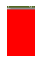

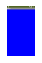

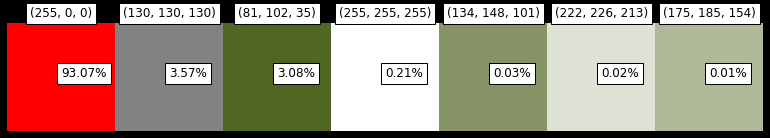

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


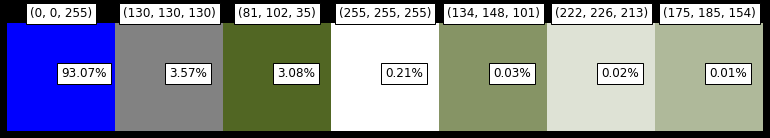

(0, 0) -> 52.88  	||	((93.07 - 93.07)*0.55 + 52.88 *1.50 ) * 93.07*0.01 = 73.82   	||	(0, 0) -> 73.82
(1, 1) -> 0.00  	||	((3.57 - 3.57)*0.55 + 0.00 *1.50 ) * 3.57*0.01 = 0.00   	||	(1, 1) -> 0.00
(2, 2) -> 0.00  	||	((3.08 - 3.08)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 2) -> 0.00
(3, 3) -> 0.00  	||	((0.21 - 0.21)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 3) -> 0.00
(4, 4) -> 0.00  	||	((0.03 - 0.03)*0.55 + 0.00 *1.50 ) * 0.03*0.01 = 0.00   	||	(4, 4) -> 0.00
(5, 5) -> 0.00  	||	((0.02 - 0.02)*0.55 + 0.00 *1.50 ) * 0.02*0.01 = 0.00   	||	(5, 5) -> 0.00
(6, 6) -> 0.00  	||	((0.01 - 0.01)*0.55 + 0.00 *1.50 ) * 0.01*0.01 = 0.00   	||	(6, 6) -> 0.00
A similaridade total é: 73.822459


73.822459016787192

time: 5.05 s (started: 2022-03-22 22:11:23 +00:00)


In [ ]:
#Exemplificação com duas telas diferentes
screens_app_path_list_1 = apps_path_examples_dict['red.png']
screens_app_path_list_2 = apps_path_examples_dict['blue.png']

# Parâmetros essenciais - interferem diretamente no resultado
tolerance = 10 #Valor ótimo de tolerancia = 10 obtido a partir de testes
th_pctg = 0.01
th_qtd = 10

sim.app_pair_path_similarity_matrix(screens_app_path_list_1, screens_app_path_list_2,
                                    tolerance, th_pctg, th_qtd)

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


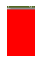

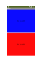

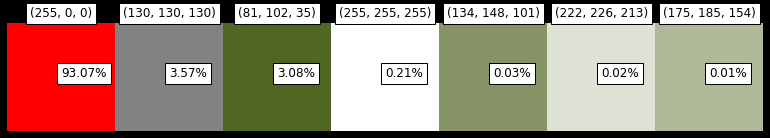

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


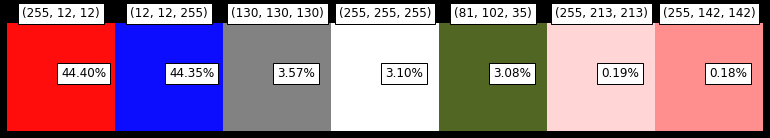

(0, 0) -> 0.95  	||	((93.07 - 44.40)*0.55 + 0.95 *1.50 ) * 93.07*0.01 = 26.24   	||	(0, 0) -> 26.24
(1, 1) -> 38.68  	||	((3.57 - 44.35)*0.55 + 38.68 *1.50 ) * 3.57*0.01 = 2.87   	||	(1, 1) -> 2.87
(2, 4) -> 0.00  	||	((3.08 - 3.08)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 4) -> 0.00
(3, 3) -> 0.00  	||	((0.21 - 3.10)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 3) -> 0.00
(4, 2) -> 18.53  	||	((0.03 - 3.57)*0.55 + 18.53 *1.50 ) * 0.03*0.01 = 0.01   	||	(4, 2) -> 0.01
(5, 5) -> 21.85  	||	((0.02 - 0.19)*0.55 + 21.85 *1.50 ) * 0.02*0.01 = 0.01   	||	(5, 5) -> 0.01
(6, 6) -> 36.54  	||	((0.01 - 0.18)*0.55 + 36.54 *1.50 ) * 0.01*0.01 = 0.01   	||	(6, 6) -> 0.01
A similaridade total é: 29.130053


29.130053194362805

time: 4.84 s (started: 2022-03-22 22:11:43 +00:00)


In [ ]:
#Exemplificação com duas telas diferentes, porém com uma parte de cores iguais
screens_app_path_list_1 = apps_path_examples_dict['red.png']
screens_app_path_list_2 = apps_path_examples_dict['blue-red50.png']

# Parâmetros essenciais - interferem diretamente no resultado
tolerance = 10 #Valor ótimo de tolerancia = 10 obtido a partir de testes
th_pctg = 0.01
th_qtd = 10

sim.app_pair_path_similarity_matrix(screens_app_path_list_1, screens_app_path_list_2,
                                    tolerance, th_pctg, th_qtd)

# Cálculo da similaridade de um app query vs universo de referência 1-n

## Cálculo da similaridade e visualização

red.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/red.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


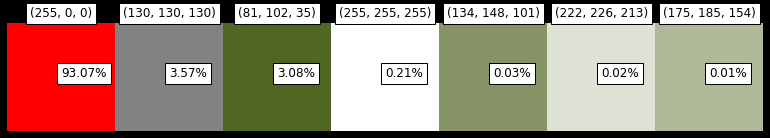

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


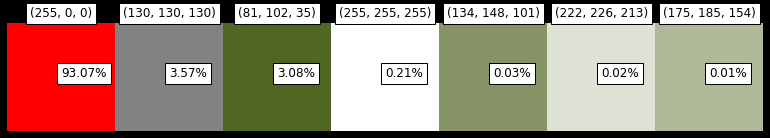

(0, 0) -> 0.00  	||	((93.07 - 93.07)*0.55 + 0.00 *1.50 ) * 93.07*0.01 = 0.00   	||	(0, 0) -> 0.00
(1, 1) -> 0.00  	||	((3.57 - 3.57)*0.55 + 0.00 *1.50 ) * 3.57*0.01 = 0.00   	||	(1, 1) -> 0.00
(2, 2) -> 0.00  	||	((3.08 - 3.08)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 2) -> 0.00
(3, 3) -> 0.00  	||	((0.21 - 0.21)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 3) -> 0.00
(4, 4) -> 0.00  	||	((0.03 - 0.03)*0.55 + 0.00 *1.50 ) * 0.03*0.01 = 0.00   	||	(4, 4) -> 0.00
(5, 5) -> 0.00  	||	((0.02 - 0.02)*0.55 + 0.00 *1.50 ) * 0.02*0.01 = 0.00   	||	(5, 5) -> 0.00
(6, 6) -> 0.00  	||	((0.01 - 0.01)*0.55 + 0.00 *1.50 ) * 0.01*0.01 = 0.00   	||	(6, 6) -> 0.00
A similaridade total é: 0.000000
0.0
blue.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


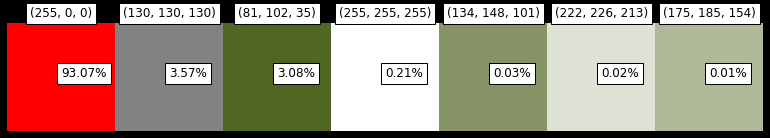

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


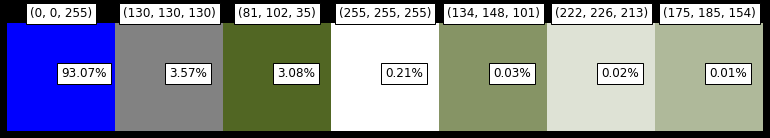

(0, 0) -> 52.88  	||	((93.07 - 93.07)*0.55 + 52.88 *1.50 ) * 93.07*0.01 = 73.82   	||	(0, 0) -> 73.82
(1, 1) -> 0.00  	||	((3.57 - 3.57)*0.55 + 0.00 *1.50 ) * 3.57*0.01 = 0.00   	||	(1, 1) -> 0.00
(2, 2) -> 0.00  	||	((3.08 - 3.08)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 2) -> 0.00
(3, 3) -> 0.00  	||	((0.21 - 0.21)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 3) -> 0.00
(4, 4) -> 0.00  	||	((0.03 - 0.03)*0.55 + 0.00 *1.50 ) * 0.03*0.01 = 0.00   	||	(4, 4) -> 0.00
(5, 5) -> 0.00  	||	((0.02 - 0.02)*0.55 + 0.00 *1.50 ) * 0.02*0.01 = 0.00   	||	(5, 5) -> 0.00
(6, 6) -> 0.00  	||	((0.01 - 0.01)*0.55 + 0.00 *1.50 ) * 0.01*0.01 = 0.00   	||	(6, 6) -> 0.00
A similaridade total é: 73.822459
73.8224590168
green.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/green.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


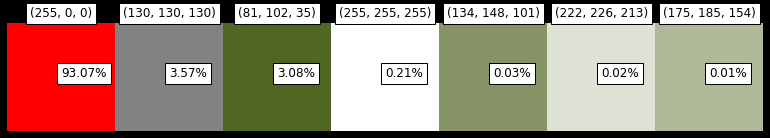

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


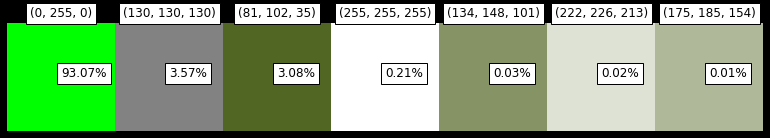

(0, 1) -> 31.21  	||	((93.07 - 3.57)*0.55 + 31.21 *1.50 ) * 93.07*0.01 = 89.40   	||	(0, 1) -> 89.40
(1, 0) -> 41.25  	||	((3.57 - 93.07)*0.55 + 41.25 *1.50 ) * 3.57*0.01 = 3.96   	||	(1, 0) -> 3.96
(2, 2) -> 0.00  	||	((3.08 - 3.08)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 2) -> 0.00
(3, 3) -> 0.00  	||	((0.21 - 0.21)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 3) -> 0.00
(4, 4) -> 0.00  	||	((0.03 - 0.03)*0.55 + 0.00 *1.50 ) * 0.03*0.01 = 0.00   	||	(4, 4) -> 0.00
(5, 5) -> 0.00  	||	((0.02 - 0.02)*0.55 + 0.00 *1.50 ) * 0.02*0.01 = 0.00   	||	(5, 5) -> 0.00
(6, 6) -> 0.00  	||	((0.01 - 0.01)*0.55 + 0.00 *1.50 ) * 0.01*0.01 = 0.00   	||	(6, 6) -> 0.00
A similaridade total é: 93.358061
93.3580610389
green-red50.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/green-red50.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


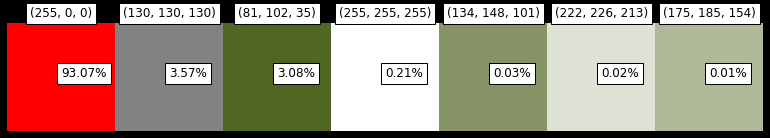

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


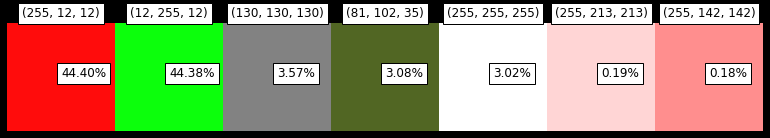

(0, 0) -> 0.95  	||	((93.07 - 44.40)*0.55 + 0.95 *1.50 ) * 93.07*0.01 = 26.24   	||	(0, 0) -> 26.24
(1, 2) -> 0.00  	||	((3.57 - 3.57)*0.55 + 0.00 *1.50 ) * 3.57*0.01 = 0.00   	||	(1, 2) -> 0.00
(2, 3) -> 0.00  	||	((3.08 - 3.08)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 3) -> 0.00
(3, 4) -> 0.00  	||	((0.21 - 3.02)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 4) -> 0.00
(4, 1) -> 31.01  	||	((0.03 - 44.38)*0.55 + 31.01 *1.50 ) * 0.03*0.01 = 0.02   	||	(4, 1) -> 0.02
(5, 5) -> 21.85  	||	((0.02 - 0.19)*0.55 + 21.85 *1.50 ) * 0.02*0.01 = 0.01   	||	(5, 5) -> 0.01
(6, 6) -> 36.54  	||	((0.01 - 0.18)*0.55 + 36.54 *1.50 ) * 0.01*0.01 = 0.01   	||	(6, 6) -> 0.01
A similaridade total é: 26.273891
26.2738905034
blue-red50.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-red50.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


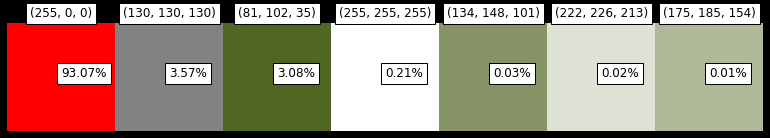

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


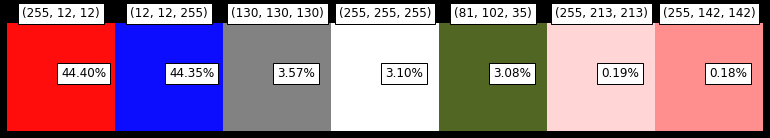

(0, 0) -> 0.95  	||	((93.07 - 44.40)*0.55 + 0.95 *1.50 ) * 93.07*0.01 = 26.24   	||	(0, 0) -> 26.24
(1, 1) -> 38.68  	||	((3.57 - 44.35)*0.55 + 38.68 *1.50 ) * 3.57*0.01 = 2.87   	||	(1, 1) -> 2.87
(2, 4) -> 0.00  	||	((3.08 - 3.08)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 4) -> 0.00
(3, 3) -> 0.00  	||	((0.21 - 3.10)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 3) -> 0.00
(4, 2) -> 18.53  	||	((0.03 - 3.57)*0.55 + 18.53 *1.50 ) * 0.03*0.01 = 0.01   	||	(4, 2) -> 0.01
(5, 5) -> 21.85  	||	((0.02 - 0.19)*0.55 + 21.85 *1.50 ) * 0.02*0.01 = 0.01   	||	(5, 5) -> 0.01
(6, 6) -> 36.54  	||	((0.01 - 0.18)*0.55 + 36.54 *1.50 ) * 0.01*0.01 = 0.01   	||	(6, 6) -> 0.01
A similaridade total é: 29.130053
29.1300531944
blue-green50.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-green50.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).

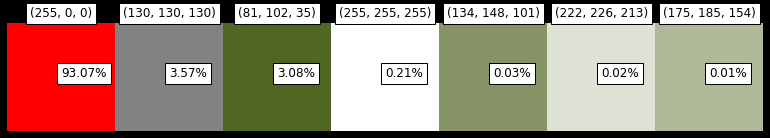

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


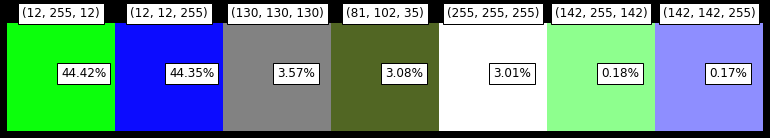

(0, 1) -> 52.65  	||	((93.07 - 44.35)*0.55 + 52.65 *1.50 ) * 93.07*0.01 = 98.44   	||	(0, 1) -> 98.44
(1, 2) -> 0.00  	||	((3.57 - 3.57)*0.55 + 0.00 *1.50 ) * 3.57*0.01 = 0.00   	||	(1, 2) -> 0.00
(2, 3) -> 0.00  	||	((3.08 - 3.08)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 3) -> 0.00
(3, 4) -> 0.00  	||	((0.21 - 3.01)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 4) -> 0.00
(4, 0) -> 31.01  	||	((0.03 - 44.42)*0.55 + 31.01 *1.50 ) * 0.03*0.01 = 0.02   	||	(4, 0) -> 0.02
(5, 6) -> 38.37  	||	((0.02 - 0.17)*0.55 + 38.37 *1.50 ) * 0.02*0.01 = 0.01   	||	(5, 6) -> 0.01
(6, 5) -> 22.38  	||	((0.01 - 0.18)*0.55 + 22.38 *1.50 ) * 0.01*0.01 = 0.00   	||	(6, 5) -> 0.00
A similaridade total é: 98.483677
98.4836767383
blue-green90.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-green90.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).

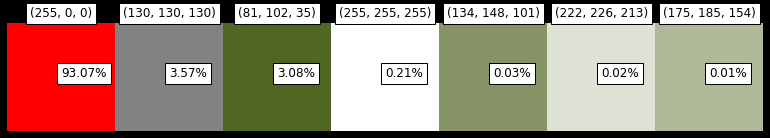

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


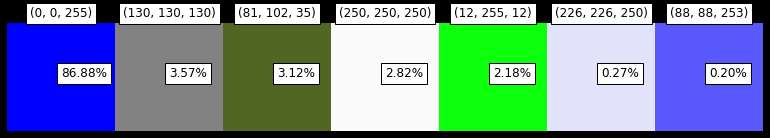

(0, 0) -> 52.88  	||	((93.07 - 86.88)*0.55 + 52.88 *1.50 ) * 93.07*0.01 = 76.99   	||	(0, 0) -> 76.99
(1, 6) -> 31.19  	||	((3.57 - 0.20)*0.55 + 31.19 *1.50 ) * 3.57*0.01 = 1.73   	||	(1, 6) -> 1.73
(2, 2) -> 0.00  	||	((3.08 - 3.12)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 2) -> 0.00
(3, 3) -> 1.00  	||	((0.21 - 2.82)*0.55 + 1.00 *1.50 ) * 0.21*0.01 = 0.01   	||	(3, 3) -> 0.01
(4, 1) -> 18.53  	||	((0.03 - 3.57)*0.55 + 18.53 *1.50 ) * 0.03*0.01 = 0.01   	||	(4, 1) -> 0.01
(5, 5) -> 17.31  	||	((0.02 - 0.27)*0.55 + 17.31 *1.50 ) * 0.02*0.01 = 0.00   	||	(5, 5) -> 0.00
(6, 4) -> 27.32  	||	((0.01 - 2.18)*0.55 + 27.32 *1.50 ) * 0.01*0.01 = 0.00   	||	(6, 4) -> 0.00
A similaridade total é: 78.753164
78.7531638711
blue-red90.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-red90.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


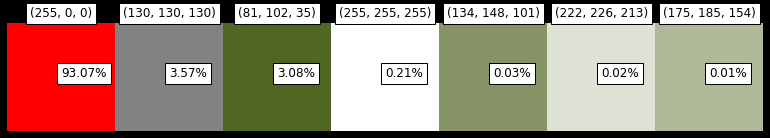

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


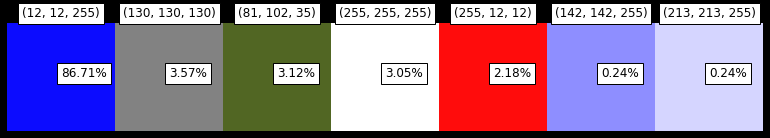

(0, 4) -> 0.95  	||	((93.07 - 2.18)*0.55 + 0.95 *1.50 ) * 93.07*0.01 = 47.85   	||	(0, 4) -> 47.85
(1, 0) -> 38.68  	||	((3.57 - 86.71)*0.55 + 38.68 *1.50 ) * 3.57*0.01 = 3.70   	||	(1, 0) -> 3.70
(2, 2) -> 0.00  	||	((3.08 - 3.12)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 2) -> 0.00
(3, 3) -> 0.00  	||	((0.21 - 3.05)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 3) -> 0.00
(4, 1) -> 18.53  	||	((0.03 - 3.57)*0.55 + 18.53 *1.50 ) * 0.03*0.01 = 0.01   	||	(4, 1) -> 0.01
(5, 6) -> 22.62  	||	((0.02 - 0.24)*0.55 + 22.62 *1.50 ) * 0.02*0.01 = 0.01   	||	(5, 6) -> 0.01
(6, 5) -> 42.28  	||	((0.01 - 0.24)*0.55 + 42.28 *1.50 ) * 0.01*0.01 = 0.01   	||	(6, 5) -> 0.01
A similaridade total é: 51.576211
51.576210792
blue-red80.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-red80.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


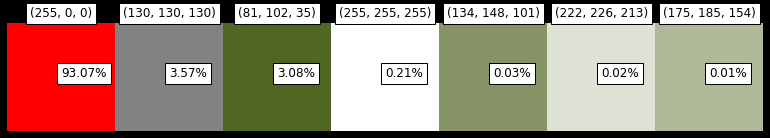

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


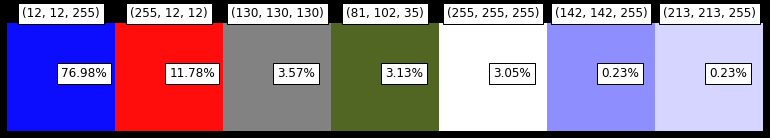

(0, 1) -> 0.95  	||	((93.07 - 11.78)*0.55 + 0.95 *1.50 ) * 93.07*0.01 = 42.94   	||	(0, 1) -> 42.94
(1, 0) -> 38.68  	||	((3.57 - 76.98)*0.55 + 38.68 *1.50 ) * 3.57*0.01 = 3.51   	||	(1, 0) -> 3.51
(2, 3) -> 0.00  	||	((3.08 - 3.13)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 3) -> 0.00
(3, 4) -> 0.00  	||	((0.21 - 3.05)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 4) -> 0.00
(4, 2) -> 18.53  	||	((0.03 - 3.57)*0.55 + 18.53 *1.50 ) * 0.03*0.01 = 0.01   	||	(4, 2) -> 0.01
(5, 6) -> 22.62  	||	((0.02 - 0.23)*0.55 + 22.62 *1.50 ) * 0.02*0.01 = 0.01   	||	(5, 6) -> 0.01
(6, 5) -> 42.28  	||	((0.01 - 0.23)*0.55 + 42.28 *1.50 ) * 0.01*0.01 = 0.01   	||	(6, 5) -> 0.01
A similaridade total é: 46.471658
46.4716582533
blue-green80.png ['/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Exemplos/blue-green80.png']
Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).

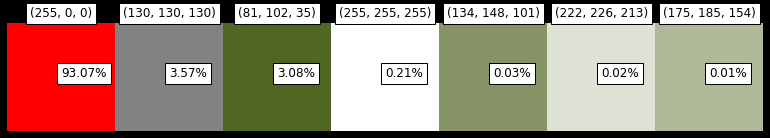

Plotting 7 colors because the amount of colors above the threshold percentage (0.01) is 7 and, thus, below the threshold for quantity (10).


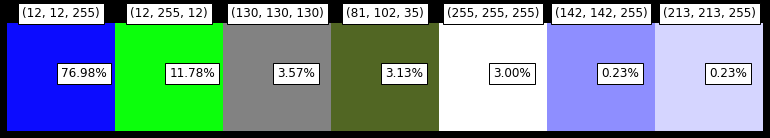

(0, 0) -> 52.65  	||	((93.07 - 76.98)*0.55 + 52.65 *1.50 ) * 93.07*0.01 = 81.74   	||	(0, 0) -> 81.74
(1, 5) -> 27.42  	||	((3.57 - 0.23)*0.55 + 27.42 *1.50 ) * 3.57*0.01 = 1.53   	||	(1, 5) -> 1.53
(2, 3) -> 0.00  	||	((3.08 - 3.13)*0.55 + 0.00 *1.50 ) * 3.08*0.01 = 0.00   	||	(2, 3) -> 0.00
(3, 4) -> 0.00  	||	((0.21 - 3.00)*0.55 + 0.00 *1.50 ) * 0.21*0.01 = 0.00   	||	(3, 4) -> 0.00
(4, 2) -> 18.53  	||	((0.03 - 3.57)*0.55 + 18.53 *1.50 ) * 0.03*0.01 = 0.01   	||	(4, 2) -> 0.01
(5, 6) -> 22.62  	||	((0.02 - 0.23)*0.55 + 22.62 *1.50 ) * 0.02*0.01 = 0.01   	||	(5, 6) -> 0.01
(6, 1) -> 27.32  	||	((0.01 - 11.78)*0.55 + 27.32 *1.50 ) * 0.01*0.01 = 0.01   	||	(6, 1) -> 0.01
A similaridade total é: 83.300389
83.3003888863
time: 27.8 s (started: 2022-03-22 22:12:09 +00:00)


In [ ]:
#Exemplificação de uma tela vermelha vs todas as telas de exemplos
screens_query_app = apps_path_examples_dict['red.png']

# Parâmetros essenciais - interferem diretamente no resultado
tolerance = 10 #Valor ótimo de tolerancia = 10 obtido a partir de testes
th_pctg = 0.01
th_qtd = 10

query_app_sim_un_apps_dict = sim.query_app_path_similarity_matrix(
                                    screens_query_app, apps_path_examples_dict,
                                    tolerance, th_pctg, th_qtd)

In [ ]:
#Visualizar as similaridades do mais similar ao menos similar
#sorted(query_app_sim_un_apps_dict.items(), key=lambda x:x[1])
#Opção de baixo é melhor para visualização

time: 1.95 ms (started: 2022-03-22 19:25:51 +00:00)


In [ ]:
#Visualizar as similaridades do mais similar ao menos similar
df_sim = pd.DataFrame()
i = 0
for key in query_app_sim_un_apps_dict:
    df_sim.at[i, 'name'] = key
    df_sim.at[i, 'red.png'] = query_app_sim_un_apps_dict[key]
    i = i + 1
df_sim.sort_values(by=['red.png'])

,name,red.png
0,red.png,0.000000
3,green-red50.png,26.273891
4,blue-red50.png,29.130053
8,blue-red80.png,46.471658
7,blue-red90.png,51.576211
1,blue.png,73.822459
6,blue-green90.png,78.753164
9,blue-green80.png,83.300389
2,green.png,93.358061
5,blue-green50.png,98.483677


time: 45.5 ms (started: 2022-03-22 22:13:34 +00:00)


##Originalidade

In [ ]:
#Calculando uma nota de originalidade por meio da média
df_originality = pd.DataFrame(sorted(query_app_sim_un_apps_dict.items(), key=lambda x:x[1]))
nota_originality = df_originality[1].mean()
print('Nota originalidade: ', nota_originality)

Nota originalidade:  58.116956229441165
time: 8.14 ms (started: 2022-03-22 22:13:41 +00:00)


# Cálculo da similaridade de n apps query vs universo de referência n-n

In [14]:
# Carregamento dados de treinamento
local = r'/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Treinamento'

df = pd.DataFrame(columns=['ID_image','filename','label'])
i = 0
for path in Path(local).rglob('*.png'):
    filename = str(path).split(os.sep)[len(str(path).split(os.sep))-1]
    label_name = str(path).split(os.sep)[len(str(path).split(os.sep))-2]
    df.at[i, 'ID_image'] = filename.split('.png')[0]
    df.at[i, 'filename'] = label_name + os.sep + filename
    df.at[i, 'label'] = str(path).split(os.sep)[len(str(path).split(os.sep))-2]
    i = i + 1
df

,ID_image,filename,label
0,Pikachu_1,original/Pikachu_1.png,original
1,4507115263885312_10,original/4507115263885312_10.png,original
2,4536753883185152_7,original/4536753883185152_7.png,original
3,4536753883185152_2,original/4536753883185152_2.png,original
4,4536753883185152_4,original/4536753883185152_4.png,original
...,...,...,...
143,InfoCarvalhal_6,nada_original/InfoCarvalhal_6.png,nada_original
144,InfoCarvalhal_7,nada_original/InfoCarvalhal_7.png,nada_original
145,5420291046768640-1,nada_original/5420291046768640-1.png,nada_original
146,InfoCarvalhal_1,nada_original/InfoCarvalhal_1.png,nada_original


time: 1.06 s (started: 2022-03-23 18:36:28 +00:00)


In [ ]:
# Preparando diionário com todas as screenshots
apps_un_path_dict = {}

for ID_image, filename in zip(df.ID_image, df.filename): 
    path = local + os.sep + filename
    apps_un_path_dict.setdefault(ID_image, []).append(str(path))

#pprint.pprint(apps_un_path_dict)

time: 25.2 ms (started: 2022-03-22 22:13:48 +00:00)


##Extração

In [ ]:
#@title
#Extraindo a paleta de cores das screnshots
# (e salvando-os em um json - "data.json" - a ser baixado direto no colab)

# Parâmetros essenciais - interferem diretamente no resultado
tolerance = 10 #Valor ótimo de tolerancia = 10 obtido a partir de testes
th_pctg = 0.01 #Valor para pegar porcentagens > 0.01 (se vai usar depois é outros 500)
th_qtd = 10    #Valor do threshold da quantidade

sorted_all_apps_colors_dict = app.get_all_palete_app_screensapps_dict(apps_un_path_dict, tolerance, th_pctg, th_qtd)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Olhando a qtd extraída
len(sorted_all_apps_colors_dict)

148

time: 5.08 ms (started: 2022-03-22 22:14:41 +00:00)


In [ ]:
# Olhando as chaves
sorted_all_apps_colors_dict.keys()

dict_keys(['Pikachu_1', '4507115263885312_10', '4536753883185152_7', '4536753883185152_2', '4536753883185152_4', '4536753883185152_3', '4536753883185152_1', '4536753883185152_5', '4536753883185152_6', '4544584486223872_2', '4544584486223872_3', '4544584486223872_1', '4544584486223872_4', '4579610260406272_1', '4613617811456000_2', '4613617811456000_1', '6032688107225088_1', 'AcheiOseuEmprego_4', 'AcheiOseuEmprego_1', 'AcheiOseuEmprego_2', 'AcheiOseuEmprego_3', 'colabora_escola_1', 'Chazaum_2', 'ClicDenuncia_1', 'colabora_escola_2', 'ClicDenuncia_3', 'Chazaum_3', 'ClicDenuncia_4', 'Chazaum_1', 'ClicDenuncia_2', 'colabora_escola_3', 'Rotas_Seguras_PMR_3', 'Rotas_Seguras_PMR_4', 'MoveWithMe_4', 'FloripaSolidaria_1', 'Rotas_Seguras_PMR_1', 'FloripaSolidaria_5', 'MoveWithMe_6', 'FloripaSolidaria_2', 'MoveWithMe_5', 'FloripaSolidaria_3', 'MoveWithMe_1', 'MoveWithMe_2', 'MoveWithMe_3', 'FloripaSolidaria_4', 'Rotas_Seguras_PMR_2', 'TesteFacil_7', 'TesteFacil_5', 'TesteFacil_3', 'TesteFacil_6',

time: 5.21 ms (started: 2022-03-22 22:14:44 +00:00)


Plotting 10 colors because the amount of colors above the threshold percentage (0.01) is 55 and, thus, exceeds the threshold for quantity (10).
Total represented percentage that will be showed in palette 89


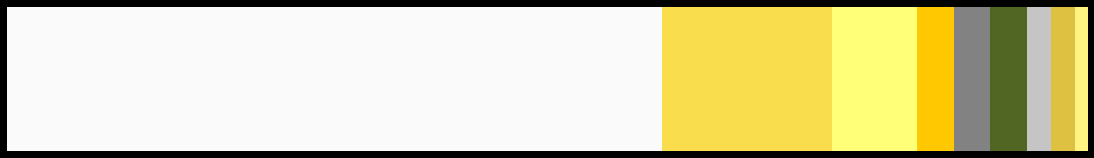

Plotting 10 colors because the amount of colors above the threshold percentage (0.01) is 55 and, thus, exceeds the threshold for quantity (10).


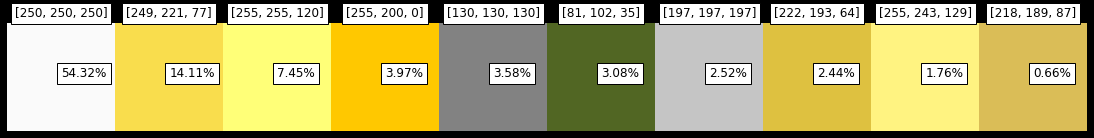

time: 2.77 s (started: 2022-03-22 22:16:35 +00:00)


In [ ]:
# Visualizando uma paleta extraída
th_pctg = 0.01 #tudo que tiver porcentagem >= 0.1% (por questões de praticidade)
th_qtd = 10 #até 10 cores (por questões de praticidade)
app.plot_app_proportional_color_palette_from_dict(sorted_all_apps_colors_dict['Pikachu_1'][0],
                                                  th_pctg=th_pctg, th_qtd=th_qtd)

app.plot_app_color_palette_from_dict_info(sorted_all_apps_colors_dict['Pikachu_1'][0],
                                          size=1.5, th_pctg=th_pctg, th_qtd=th_qtd)

In [ ]:
# Visualizando todas as paletas extraídas

# for sorted_app_colors_dict in sorted_all_apps_colors_dict:
    # print(sorted_app_colors_dict)
    # app.plot_app_proportional_color_palette_from_dict(sorted_all_apps_colors_dict[sorted_app_colors_dict][0], 
                                    #  th_pctg = 1, th_qtd = 10)

time: 2.62 ms (started: 2022-03-22 14:03:48 +00:00)


In [ ]:
import json
# Opening JSON file
with open('data.json') as json_file:
    sorted_all_apps_colors_dict = json.load(json_file)

time: 15.4 ms (started: 2022-03-22 22:14:38 +00:00)


##Cálculo da similaridade

In [ ]:
# Parâmetros essenciais - interferem diretamente no resultado
tolerance = 10 #Valor ótimo de tolerancia = 10 obtido a partir de testes
th_pctg = 0.01
th_qtd = 10

i = 0
df_sim_matrix = pd.DataFrame()
total = len(sorted_all_apps_colors_dict)
for query_app_palette_name in sorted_all_apps_colors_dict:
    print(f'======\nAnalyzing app {i}/{total}\n======')
    i = i + 1
    for comparison_app_palette in sorted_all_apps_colors_dict:
        print(f'Analysing app {query_app_palette_name} vs. {comparison_app_palette}')
        query_app_palette = sorted_all_apps_colors_dict[query_app_palette_name][0]
        app_comparison_palette_now = sorted_all_apps_colors_dict[comparison_app_palette][0]
        color_sim_matrix = sim.app_pair_palette_similarity_matrix(query_app_palette,
                                                                app_comparison_palette_now,
                                                                th_pctg, th_qtd)
        similarity = sim.optimized_map_sim_palette(query_app_palette,
                                                app_comparison_palette_now,
                                                color_sim_matrix)
        query_app_sim_un_apps_dict[app] = similarity
        print(similarity)
        df_sim_matrix.at[query_app_palette_name, comparison_app_palette] = similarity

Analyzing app 0/148
Analysing app Pikachu_1 vs. Pikachu_1
Adjusting size of the first app palette based on thresholds
Due to the quantity threshold app palette has been updated from 100 to 10
Adjusting size of the second app palette based on thresholds and the size of the first palette
Due to the quantity threshold app palette has been updated from 100 to 10
A similaridade total é: 0.000000
0.0
Analysing app Pikachu_1 vs. 4507115263885312_10
Adjusting size of the first app palette based on thresholds
Due to the quantity threshold app palette has been updated from 100 to 10
Adjusting size of the second app palette based on thresholds and the size of the first palette
Due to the quantity threshold app palette has been updated from 40 to 10
A similaridade total é: 29.894594
29.8945942834
Analysing app Pikachu_1 vs. 4536753883185152_7
Adjusting size of the first app palette based on thresholds
Due to the quantity threshold app palette has been updated from 100 to 10
Adjusting size of the s

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


A saída de streaming foi truncada nas últimas 5000 linhas.
Adjusting size of the second app palette based on thresholds and the size of the first palette
Due to the quantity threshold app palette has been updated from 39 to 8
A similaridade total é: 62.620993
62.6209933825
Analysing app InfoCarvalhal_6 vs. petfinder_2
Adjusting size of the first app palette based on thresholds
Due to the quantity threshold app palette has been updated from 11 to 10
Due to the percentage threshold app palette has been updated from 10 to 8
Adjusting size of the second app palette based on thresholds and the size of the first palette
Due to the quantity threshold app palette has been updated from 13 to 8
A similaridade total é: 9.281960
9.28195981892
Analysing app InfoCarvalhal_6 vs. petfinder_3
Adjusting size of the first app palette based on thresholds
Due to the quantity threshold app palette has been updated from 11 to 10
Due to the percentage threshold app palette has been updated from 10 to 8
Adjust

In [ ]:
#Salvar para uso posterior
df_sim_matrix.to_excel('df_sim_matrixv2.xlsx')

time: 1.24 s (started: 2022-03-22 21:07:48 +00:00)


In [7]:
#Carregar de uso anterior
df_sim_matrix = pd.read_excel('df_sim_matrixv2.xlsx')

time: 965 ms (started: 2022-03-23 18:35:52 +00:00)


##Originalidade via Média

In [8]:
#Visualizando a matriz de similaridades
df_sim_matrix

,Unnamed: 0,Pikachu_1,4507115263885312_10,4536753883185152_7,4536753883185152_2,4536753883185152_4,4536753883185152_3,4536753883185152_1,4536753883185152_5,4536753883185152_6,...,6130789513691136_2,6130789513691136_1,InfoCarvalhal_5,InfoCarvalhal_2,InfoCarvalhal_3,InfoCarvalhal_6,InfoCarvalhal_7,5420291046768640-1,InfoCarvalhal_1,InfoCarvalhal_4
0,Pikachu_1,0.000000,29.894594,37.708609,53.782973,39.999146,24.180471,40.665670,29.573830,39.810793,...,31.852344,25.873859,43.631756,41.520686,41.600577,43.641047,43.632281,26.699577,60.570012,43.668033
1,4507115263885312_10,68.682897,0.000000,49.500022,66.312037,67.264211,55.854271,59.821411,50.935149,61.304685,...,66.926262,55.456469,72.708035,64.538905,64.531566,72.766192,72.711508,62.243653,75.666734,71.362152
2,4536753883185152_7,84.993110,45.387147,0.000000,12.520277,1.409740,14.197096,5.772082,1.960689,1.699060,...,41.343172,38.951158,113.181920,109.891956,111.489847,113.385853,113.194140,57.072880,41.769633,108.095919
3,4536753883185152_2,73.259310,29.171416,13.048796,0.000000,11.960564,3.866542,12.082250,12.318412,11.962633,...,33.366781,30.189802,87.031078,83.353885,85.071509,87.249586,87.044161,38.974795,31.735065,81.465311
4,4536753883185152_4,132.937605,44.966016,0.593732,10.842365,0.000000,14.337775,1.560055,2.563379,1.525721,...,41.742628,39.631262,114.719875,104.947045,104.975550,114.928352,114.732368,57.691074,41.720963,109.519033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,InfoCarvalhal_6,80.328378,79.814207,52.432667,38.650125,52.062524,30.964273,47.821674,52.148665,52.749362,...,7.207979,17.105860,0.232823,4.130937,2.286705,0.000000,0.218916,45.027644,2.634795,6.325540
144,InfoCarvalhal_7,79.936313,79.656493,52.549503,38.780673,52.183631,30.796651,47.682665,52.259040,52.868135,...,7.358295,17.210627,0.013908,3.911224,2.067091,0.218915,0.000000,44.960372,2.409196,6.105428
145,5420291046768640-1,21.394470,20.650496,18.430716,22.981288,20.377202,14.667640,22.430466,17.633447,17.787295,...,20.276389,19.940447,22.507096,20.743284,20.896085,22.526696,22.508262,0.000000,24.095806,22.080395
146,InfoCarvalhal_1,77.719933,75.533005,83.198749,30.925632,45.811909,27.716755,42.577396,83.491694,44.388970,...,7.612760,13.180770,3.274923,2.463016,1.457385,3.500638,3.288406,39.889895,0.000000,4.672204


time: 43.9 ms (started: 2022-03-23 18:36:01 +00:00)


In [9]:
#Cálculo da nota final
df_sim_matrix['Nota_final'] = df_sim_matrix.mean(numeric_only=True, axis=1)
df_sim_matrix

,Unnamed: 0,Pikachu_1,4507115263885312_10,4536753883185152_7,4536753883185152_2,4536753883185152_4,4536753883185152_3,4536753883185152_1,4536753883185152_5,4536753883185152_6,...,6130789513691136_1,InfoCarvalhal_5,InfoCarvalhal_2,InfoCarvalhal_3,InfoCarvalhal_6,InfoCarvalhal_7,5420291046768640-1,InfoCarvalhal_1,InfoCarvalhal_4,Nota_final
0,Pikachu_1,0.000000,29.894594,37.708609,53.782973,39.999146,24.180471,40.665670,29.573830,39.810793,...,25.873859,43.631756,41.520686,41.600577,43.641047,43.632281,26.699577,60.570012,43.668033,36.199189
1,4507115263885312_10,68.682897,0.000000,49.500022,66.312037,67.264211,55.854271,59.821411,50.935149,61.304685,...,55.456469,72.708035,64.538905,64.531566,72.766192,72.711508,62.243653,75.666734,71.362152,64.850704
2,4536753883185152_7,84.993110,45.387147,0.000000,12.520277,1.409740,14.197096,5.772082,1.960689,1.699060,...,38.951158,113.181920,109.891956,111.489847,113.385853,113.194140,57.072880,41.769633,108.095919,50.591367
3,4536753883185152_2,73.259310,29.171416,13.048796,0.000000,11.960564,3.866542,12.082250,12.318412,11.962633,...,30.189802,87.031078,83.353885,85.071509,87.249586,87.044161,38.974795,31.735065,81.465311,37.195472
4,4536753883185152_4,132.937605,44.966016,0.593732,10.842365,0.000000,14.337775,1.560055,2.563379,1.525721,...,39.631262,114.719875,104.947045,104.975550,114.928352,114.732368,57.691074,41.720963,109.519033,51.403803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,InfoCarvalhal_6,80.328378,79.814207,52.432667,38.650125,52.062524,30.964273,47.821674,52.148665,52.749362,...,17.105860,0.232823,4.130937,2.286705,0.000000,0.218916,45.027644,2.634795,6.325540,34.739914
144,InfoCarvalhal_7,79.936313,79.656493,52.549503,38.780673,52.183631,30.796651,47.682665,52.259040,52.868135,...,17.210627,0.013908,3.911224,2.067091,0.218915,0.000000,44.960372,2.409196,6.105428,34.725146
145,5420291046768640-1,21.394470,20.650496,18.430716,22.981288,20.377202,14.667640,22.430466,17.633447,17.787295,...,19.940447,22.507096,20.743284,20.896085,22.526696,22.508262,0.000000,24.095806,22.080395,21.042853
146,InfoCarvalhal_1,77.719933,75.533005,83.198749,30.925632,45.811909,27.716755,42.577396,83.491694,44.388970,...,13.180770,3.274923,2.463016,1.457385,3.500638,3.288406,39.889895,0.000000,4.672204,31.779468


time: 48.8 ms (started: 2022-03-23 18:36:03 +00:00)


count    148.000000
mean      41.858750
std       18.070107
min       20.653378
25%       26.771496
50%       33.388723
75%       55.986830
max      101.304665
Name: Nota_final, dtype: float64


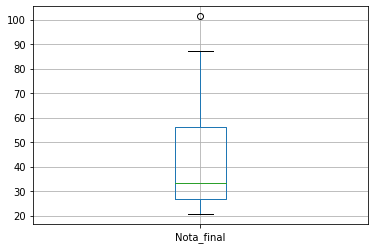

time: 187 ms (started: 2022-03-23 18:36:05 +00:00)


In [10]:
#Estatísticas descritivas da nota final
print(df_sim_matrix['Nota_final'].describe())
df_sim_matrix.boxplot(column=['Nota_final'])  

In [11]:
#Atribuindo as classes
df_sim_matrix.loc[df_sim_matrix['Nota_final'] > 0, 'pred'] = 'nada_original'
df_sim_matrix.loc[df_sim_matrix['Nota_final'] > 30, 'pred'] = 'mais_ou_menos_original'
df_sim_matrix.loc[df_sim_matrix['Nota_final'] > 50, 'pred'] = 'original'
df_sim_matrix['pred'].value_counts()

nada_original             56
original                  53
mais_ou_menos_original    39
Name: pred, dtype: int64

time: 42.1 ms (started: 2022-03-23 18:36:08 +00:00)


In [12]:
df_sim_matrix.set_index('Unnamed: 0', inplace=True)
df_sim_matrix

,Pikachu_1,4507115263885312_10,4536753883185152_7,4536753883185152_2,4536753883185152_4,4536753883185152_3,4536753883185152_1,4536753883185152_5,4536753883185152_6,4544584486223872_2,...,InfoCarvalhal_5,InfoCarvalhal_2,InfoCarvalhal_3,InfoCarvalhal_6,InfoCarvalhal_7,5420291046768640-1,InfoCarvalhal_1,InfoCarvalhal_4,Nota_final,pred
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Pikachu_1,0.000000,29.894594,37.708609,53.782973,39.999146,24.180471,40.665670,29.573830,39.810793,20.047472,...,43.631756,41.520686,41.600577,43.641047,43.632281,26.699577,60.570012,43.668033,36.199189,mais_ou_menos_original
4507115263885312_10,68.682897,0.000000,49.500022,66.312037,67.264211,55.854271,59.821411,50.935149,61.304685,89.608943,...,72.708035,64.538905,64.531566,72.766192,72.711508,62.243653,75.666734,71.362152,64.850704,original
4536753883185152_7,84.993110,45.387147,0.000000,12.520277,1.409740,14.197096,5.772082,1.960689,1.699060,66.801146,...,113.181920,109.891956,111.489847,113.385853,113.194140,57.072880,41.769633,108.095919,50.591367,original
4536753883185152_2,73.259310,29.171416,13.048796,0.000000,11.960564,3.866542,12.082250,12.318412,11.962633,45.363505,...,87.031078,83.353885,85.071509,87.249586,87.044161,38.974795,31.735065,81.465311,37.195472,mais_ou_menos_original
4536753883185152_4,132.937605,44.966016,0.593732,10.842365,0.000000,14.337775,1.560055,2.563379,1.525721,68.562378,...,114.719875,104.947045,104.975550,114.928352,114.732368,57.691074,41.720963,109.519033,51.403803,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
InfoCarvalhal_6,80.328378,79.814207,52.432667,38.650125,52.062524,30.964273,47.821674,52.148665,52.749362,27.688064,...,0.232823,4.130937,2.286705,0.000000,0.218916,45.027644,2.634795,6.325540,34.739914,mais_ou_menos_original
InfoCarvalhal_7,79.936313,79.656493,52.549503,38.780673,52.183631,30.796651,47.682665,52.259040,52.868135,27.762997,...,0.013908,3.911224,2.067091,0.218915,0.000000,44.960372,2.409196,6.105428,34.725146,mais_ou_menos_original
5420291046768640-1,21.394470,20.650496,18.430716,22.981288,20.377202,14.667640,22.430466,17.633447,17.787295,17.535497,...,22.507096,20.743284,20.896085,22.526696,22.508262,0.000000,24.095806,22.080395,21.042853,nada_original


time: 34.5 ms (started: 2022-03-23 18:36:10 +00:00)


In [15]:
#Calculando a acurácia
acertos = 0
erros = 0
for ID_image, label in zip(df.ID_image, df.label): 
    if df_sim_matrix.at[ID_image, 'pred'] == label:
        acertos = acertos + 1
    else:
        erros = erros + 1
print('acertos = ',acertos)
print('acertos = ',erros)
print('acurácia = ', acertos/(acertos+erros))

acertos =  80
acertos =  68
acurácia =  0.5405405405405406
time: 9.45 ms (started: 2022-03-23 18:36:37 +00:00)


##Originalidade via Machine Learning

In [16]:
df_sim_matrix = df_sim_matrix.drop(['Nota_final', 'pred'], axis=1)

time: 4.21 ms (started: 2022-03-23 18:36:41 +00:00)


In [17]:
df_sim_matrix

,Pikachu_1,4507115263885312_10,4536753883185152_7,4536753883185152_2,4536753883185152_4,4536753883185152_3,4536753883185152_1,4536753883185152_5,4536753883185152_6,4544584486223872_2,...,6130789513691136_2,6130789513691136_1,InfoCarvalhal_5,InfoCarvalhal_2,InfoCarvalhal_3,InfoCarvalhal_6,InfoCarvalhal_7,5420291046768640-1,InfoCarvalhal_1,InfoCarvalhal_4
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Pikachu_1,0.000000,29.894594,37.708609,53.782973,39.999146,24.180471,40.665670,29.573830,39.810793,20.047472,...,31.852344,25.873859,43.631756,41.520686,41.600577,43.641047,43.632281,26.699577,60.570012,43.668033
4507115263885312_10,68.682897,0.000000,49.500022,66.312037,67.264211,55.854271,59.821411,50.935149,61.304685,89.608943,...,66.926262,55.456469,72.708035,64.538905,64.531566,72.766192,72.711508,62.243653,75.666734,71.362152
4536753883185152_7,84.993110,45.387147,0.000000,12.520277,1.409740,14.197096,5.772082,1.960689,1.699060,66.801146,...,41.343172,38.951158,113.181920,109.891956,111.489847,113.385853,113.194140,57.072880,41.769633,108.095919
4536753883185152_2,73.259310,29.171416,13.048796,0.000000,11.960564,3.866542,12.082250,12.318412,11.962633,45.363505,...,33.366781,30.189802,87.031078,83.353885,85.071509,87.249586,87.044161,38.974795,31.735065,81.465311
4536753883185152_4,132.937605,44.966016,0.593732,10.842365,0.000000,14.337775,1.560055,2.563379,1.525721,68.562378,...,41.742628,39.631262,114.719875,104.947045,104.975550,114.928352,114.732368,57.691074,41.720963,109.519033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
InfoCarvalhal_6,80.328378,79.814207,52.432667,38.650125,52.062524,30.964273,47.821674,52.148665,52.749362,27.688064,...,7.207979,17.105860,0.232823,4.130937,2.286705,0.000000,0.218916,45.027644,2.634795,6.325540
InfoCarvalhal_7,79.936313,79.656493,52.549503,38.780673,52.183631,30.796651,47.682665,52.259040,52.868135,27.762997,...,7.358295,17.210627,0.013908,3.911224,2.067091,0.218915,0.000000,44.960372,2.409196,6.105428
5420291046768640-1,21.394470,20.650496,18.430716,22.981288,20.377202,14.667640,22.430466,17.633447,17.787295,17.535497,...,20.276389,19.940447,22.507096,20.743284,20.896085,22.526696,22.508262,0.000000,24.095806,22.080395


time: 41.3 ms (started: 2022-03-23 18:36:42 +00:00)


In [18]:
x = df_sim_matrix
y = df.set_index('ID_image')
y = y['label']
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (148, 148)
y.shape =  (148,)
time: 7.38 ms (started: 2022-03-23 18:36:47 +00:00)


In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

118
30
time: 19.2 ms (started: 2022-03-23 18:38:25 +00:00)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score

#create list of model and accuracy dicts
perform_list = [ ]

def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression(solver='liblinear')
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
   
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, _, _, _ = score(y_test, y_pred, average='micro')
    print(f'Test Accuracy Score of Basic {model_name}: % {accuracy}')
    # Add performance parameters to list
    perform_list.append(dict([
                              ('Model', model_name),
                              ('Test Accuracy', round(accuracy, 2))]))

time: 33.4 ms (started: 2022-03-23 18:38:28 +00:00)


In [35]:
run_model('Logistic Regression', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Logistic Regression: % 66.67
time: 189 ms (started: 2022-03-23 18:38:29 +00:00)


In [36]:
run_model('Random Forest', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Random Forest: % 80.0
time: 1.03 s (started: 2022-03-23 18:38:30 +00:00)


In [37]:
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Multinomial Naive Bayes: % 50.0
time: 31.9 ms (started: 2022-03-23 18:38:31 +00:00)


In [38]:
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Support Vector Classifer: % 76.67
time: 34.7 ms (started: 2022-03-23 18:38:31 +00:00)


In [39]:
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Decision Tree Classifier: % 70.0
time: 55.9 ms (started: 2022-03-23 18:38:32 +00:00)


In [40]:
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic K Nearest Neighbour: % 70.0
time: 147 ms (started: 2022-03-23 18:38:33 +00:00)


In [41]:
run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)

Test Accuracy Score of Basic Gaussian Naive Bayes: % 66.67
time: 36.7 ms (started: 2022-03-23 18:38:35 +00:00)


In [43]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy']]
model_performance

,Model,Test Accuracy
0,Logistic Regression,66.67
1,Random Forest,80.00
2,Multinomial Naive Bayes,50.00
3,Support Vector Classifer,76.67
4,Decision Tree Classifier,70.00
5,K Nearest Neighbour,70.00
6,Gaussian Naive Bayes,66.67


time: 16.8 ms (started: 2022-03-23 18:38:48 +00:00)


In [45]:
#Visualizando os erros de predição
classifier = SVC().fit(x_train, y_train)
y_pred = classifier.predict(x_test)

for (ID_image, label), pred in zip(y_test.items(), y_pred):
    if pred != label:
        print(f'ID_image: {ID_image} \n | Label: {label} \n | Predicted: {pred}')
        path = [local + os.sep + label + os.sep + ID_image + '.png']

ID_image: ClicDenuncia_4 
 | Label: original 
 | Predicted: nada_original
ID_image: Chazaum_2 
 | Label: original 
 | Predicted: mais_ou_menos_original
ID_image: Onde_andas_3 
 | Label: mais_ou_menos_original 
 | Predicted: nada_original
ID_image: TemAglomero_3 
 | Label: mais_ou_menos_original 
 | Predicted: nada_original
ID_image: RecicleMais_1 
 | Label: mais_ou_menos_original 
 | Predicted: original
ID_image: FloripaSolidaria_3 
 | Label: original 
 | Predicted: nada_original
ID_image: 5420291046768640-1 
 | Label: nada_original 
 | Predicted: original
time: 41.9 ms (started: 2022-03-23 18:39:22 +00:00)


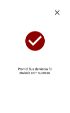

time: 542 ms (started: 2022-03-23 18:40:41 +00:00)


In [47]:
#Olhando "top losses"
local = '/content/drive/MyDrive/Doutorado/Disciplinas/Visao_Computacional/Projeto_Cores/Imagens/Treinamento/'
classe = ['original/', 'mais_ou_menos_original/', 'nada_original/']
path = [local+classe[0]+'ClicDenuncia_4' + '.png']
app.plot_screens(path)

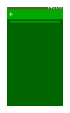

time: 316 ms (started: 2022-03-23 18:41:10 +00:00)


In [48]:
path = [local+classe[0]+'Chazaum_2' + '.png']
app.plot_screens(path)

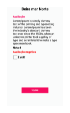

time: 559 ms (started: 2022-03-23 18:42:02 +00:00)


In [50]:
path = [local+classe[1]+'Onde_andas_3' + '.png']
app.plot_screens(path)

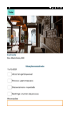

time: 535 ms (started: 2022-03-23 18:42:17 +00:00)


In [51]:
path = [local+classe[1]+'TemAglomero_3' + '.png']
app.plot_screens(path)

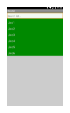

time: 521 ms (started: 2022-03-23 18:42:30 +00:00)


In [52]:
path = [local+classe[1]+'RecicleMais_1' + '.png']
app.plot_screens(path)

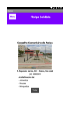

time: 326 ms (started: 2022-03-23 18:42:51 +00:00)


In [55]:
path = [local+classe[0]+'FloripaSolidaria_3' + '.png']
app.plot_screens(path)

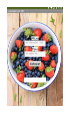

time: 600 ms (started: 2022-03-23 18:43:25 +00:00)


In [56]:
path = [local+classe[2]+'5420291046768640-1' + '.png']
app.plot_screens(path)

##Análise de comparação

Plotting 10 colors because the amount of colors above the threshold percentage (0.01) is 10 and, thus, exceeds the threshold for quantity (10).


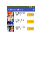

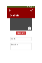

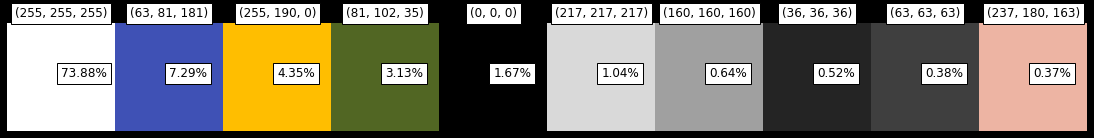

Plotting 10 colors because the amount of colors above the threshold percentage (0.01) is 10 and, thus, exceeds the threshold for quantity (10).


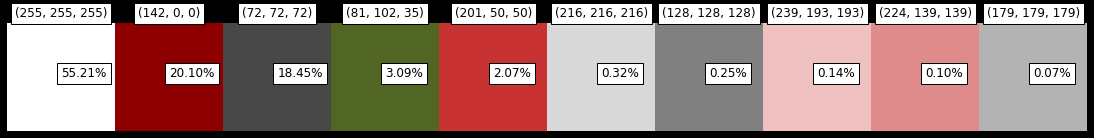

(0, 0) -> 0.00  	||	((73.88 - 55.21)*0.55 + 0.00 *1.50 ) * 73.88*0.01 = 7.59   	||	(0, 0) -> 7.59
(1, 6) -> 29.67  	||	((7.29 - 0.25)*0.55 + 29.67 *1.50 ) * 7.29*0.01 = 3.53   	||	(1, 6) -> 3.53
(2, 7) -> 33.22  	||	((4.35 - 0.14)*0.55 + 33.22 *1.50 ) * 4.35*0.01 = 2.27   	||	(2, 7) -> 2.27
(3, 3) -> 0.00  	||	((3.13 - 3.09)*0.55 + 0.00 *1.50 ) * 3.13*0.01 = 0.00   	||	(3, 3) -> 0.00
(4, 1) -> 32.80  	||	((1.67 - 20.10)*0.55 + 32.80 *1.50 ) * 1.67*0.01 = 0.99   	||	(4, 1) -> 0.99
(5, 5) -> 0.23  	||	((1.04 - 0.32)*0.55 + 0.23 *1.50 ) * 1.04*0.01 = 0.01   	||	(5, 5) -> 0.01
(6, 9) -> 5.51  	||	((0.64 - 0.07)*0.55 + 5.51 *1.50 ) * 0.64*0.01 = 0.05   	||	(6, 9) -> 0.05
(7, 4) -> 36.43  	||	((0.52 - 2.07)*0.55 + 36.43 *1.50 ) * 0.52*0.01 = 0.29   	||	(7, 4) -> 0.29
(8, 2) -> 3.00  	||	((0.38 - 18.45)*0.55 + 3.00 *1.50 ) * 0.38*0.01 = 0.06   	||	(8, 2) -> 0.06
(9, 8) -> 12.20  	||	((0.37 - 0.10)*0.55 + 12.20 *1.50 ) * 0.37*0.01 = 0.07   	||	(9, 8) -> 0.07
A similaridade total é: 14.845463


14.845462573061491

time: 20.5 s (started: 2022-03-22 22:28:55 +00:00)


In [ ]:
# Top losses
classe = ['original/', 'mais_ou_menos_original/', 'nada_original/']
screens_app_path_list_1 = [local+classe[2]+'ServiceHelper2.png']
screens_app_path_list_2 = [local+classe[0]+'ClicDenuncia_2.png']

# Parâmetros essenciais - interferem diretamente no resultado
tolerance = 10 #Valor ótimo de tolerancia = 10 obtido a partir de testes
th_pctg = 0.01
th_qtd = 10

sim.app_pair_path_similarity_matrix(screens_app_path_list_1, screens_app_path_list_2,
                                    tolerance, th_pctg, th_qtd)